In [2]:
import pandas as pd

# File paths
file_path_aisles = "instacart-market-basket-analysis/aisles.csv"
file_path_departments = "instacart-market-basket-analysis/departments.csv"
file_path_order_products_prior = "instacart-market-basket-analysis/order_products__prior.csv"
file_path_order_products_train = "instacart-market-basket-analysis/order_products__train.csv"
file_path_orders = "instacart-market-basket-analysis/orders.csv"
file_path_products = "instacart-market-basket-analysis/products.csv"
file_path_sample_submission = "instacart-market-basket-analysis/sample_submission.csv"

# Load the aisles data
aisles_df = pd.read_csv(file_path_aisles, header=0)

# Load the departments data
departments_df = pd.read_csv(file_path_departments, header=0)

# Load the order_products_prior data
order_products_prior_df = pd.read_csv(file_path_order_products_prior, header=0)

# Load the order_products_train data
order_products_train_df = pd.read_csv(file_path_order_products_train, header=0)

# Load the orders data
orders_df = pd.read_csv(file_path_orders, header=0)

# Load the products data
products_df = pd.read_csv(file_path_products, header=0)

# Load the sample_submission data
sample_submission_df = pd.read_csv(file_path_sample_submission, header=0)

# Display the first few rows of each DataFrame to verify successful loading
print("Aisles DataFrame:")
print(aisles_df.head())

# print("\nDepartments DataFrame:")
# print(departments_df.head())

print("\nOrder Products Prior DataFrame:")
print(order_products_prior_df.head())

# print("\nOrder Products Train DataFrame:")
# print(order_products_train_df.head())

print("\nOrders DataFrame:")
print(orders_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

# print("\nSample Submission DataFrame:")
# print(sample_submission_df.head())



Aisles DataFrame:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

Order Products Prior DataFrame:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

Orders DataFrame:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4    

In [4]:

products_df = pd.merge(products_df, departments_df, on="department_id", how="inner")
joined_products_df = pd.merge(products_df,aisles_df, on = "aisle_id", how = "inner")

shopping_df = pd.merge(joined_products_df,order_products_prior_df, on = "product_id" , how = "inner").sort_values(by='order_id')

shopping_with_time_df = pd.merge(shopping_df,orders_df, on = "order_id" , how = "inner").sort_values(by='order_id')
print(shopping_with_time_df)

          product_id                                       product_name  \
0              30035                                  Natural Sweetener   
1              17794                                            Carrots   
2               9327                                      Garlic Powder   
3              45918                                     Coconut Butter   
4               1819           All Natural No Stir Creamy Almond Butter   
...              ...                                                ...   
32434481        5020  Organic  Sweet & Salty Peanut Pretzel Granola ...   
32434480        7854                          Freeze Dried Mango Slices   
32434479        4600                    All Natural French Toast Sticks   
32434482       11352       Organic Mini Sandwich Crackers Peanut Butter   
32434488       45309                    Purple Carrot & blueberry Puffs   

          aisle_id  department_id department                   aisle  \
0               17         

In [3]:
# Check for missing values
print(shopping_with_time_df.isnull().sum())

# Fill missing values with the mean (or use a different strategy)
# shopping_with_time_df.fillna(shopping_with_time_df.mean(), inplace=True)


NameError: name 'shopping_with_time_df' is not defined

In [15]:

# Group data by user_id to extract customer behavior
customer_df = shopping_with_time_df.groupby("user_id").agg(
    total_orders=("order_id", "nunique"),
    total_products_ordered=("product_id", "count"),
    average_cart_size=("add_to_cart_order", "mean"),
    reorder_ratio=("reordered", "mean"),  # Mean gives the percentage of reordered items
    days_since_last_order=("days_since_prior_order", "min"),  # Most recent order
    order_frequency=("days_since_prior_order", "mean"),  # Average days between orders
)


In [16]:

# Find the most frequently purchased department per user
customer_df["most_frequent_department"] = shopping_with_time_df.groupby("user_id")["department"].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Find the most frequently purchased aisle per user
customer_df["most_frequent_aisle"] = shopping_with_time_df.groupby("user_id")["aisle"].agg(lambda x: x.mode()[0] if not x.mode().empty else "Unknown")

# Find the most common order hour per user
customer_df["order_hour_preference"] = shopping_with_time_df.groupby("user_id")["order_hour_of_day"].agg(lambda x: x.mode()[0])

# Reset index to keep user_id
customer_df.reset_index(inplace=True)


# Explanation
# x.mode() → Finds the most frequently purchased department for each user.
# x.mode()[0] → Extracts the first mode (if there are multiple).
# if not x.mode().empty else "Unknown":
# Ensures we don’t get an error if the mode is empty.
# If no department is found, assigns "Unknown".

In [14]:

# Show the new DataFrame
from IPython.display import display
display(customer_df)  # Display the first few rows


,index,user_id,total_orders,total_products_ordered,reorder_ratio,days_since_last_order,order_frequency,most_frequent_department,most_frequent_aisle,order_hour_preference
0,0,1,10,59,0.694915,0.0,20.259259,NaN,NaN,NaN
1,1,2,14,195,0.476923,3.0,15.967033,snacks,soft drinks,7.0
2,2,3,12,88,0.625000,7.0,11.487179,dairy eggs,yogurt,9.0
3,3,4,5,18,0.055556,0.0,15.357143,produce,fresh fruits,16.0
4,4,5,4,37,0.378378,10.0,14.500000,beverages,frozen meals,15.0
...,...,...,...,...,...,...,...,...,...,...
206204,206204,206205,3,32,0.250000,10.0,20.666667,produce,fresh vegetables,8.0
206205,206205,206206,67,285,0.473684,0.0,4.042705,dairy eggs,yogurt,12.0
206206,206206,206207,16,223,0.587444,1.0,14.879397,frozen,ice cream ice,18.0
206207,206207,206208,49,677,0.707533,0.0,7.442105,dairy eggs,fresh vegetables,12.0


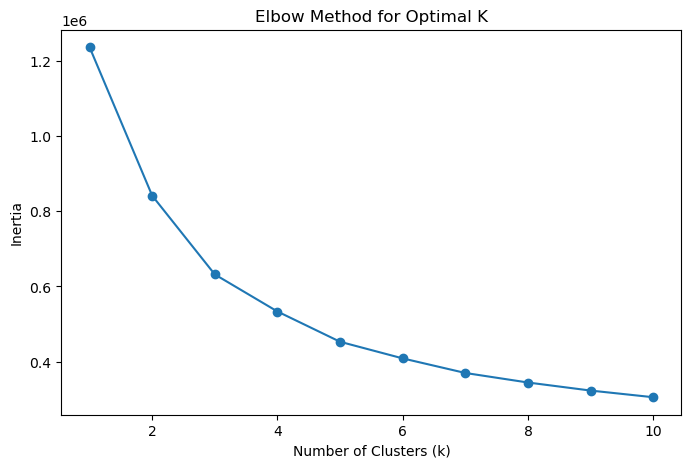

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select only numerical features for clustering
features = ['total_orders', 'total_products_ordered', 'average_cart_size', 
            'reorder_ratio', 'days_since_last_order', 'order_frequency']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[features])

# Use the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [36]:
# Apply K-Means with the optimal number of clusters (example: k=4)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)
display(customer_df)  # Display the first few rows


,user_id,total_orders,total_products_ordered,average_cart_size,reorder_ratio,days_since_last_order,order_frequency,most_frequent_department,most_frequent_aisle,order_hour_preference,Cluster,PCA1,PCA2
0,1,10,59,3.627119,0.694915,0.0,20.259259,snacks,soft drinks,7,1,0.071349,-0.897776
1,2,14,195,8.553846,0.476923,3.0,15.967033,dairy eggs,yogurt,9,1,0.370572,0.386403
2,3,12,88,4.443182,0.625000,7.0,11.487179,produce,fresh fruits,16,1,0.254642,-0.730437
3,4,5,18,2.777778,0.055556,0.0,15.357143,beverages,frozen meals,15,1,-1.189149,-1.507253
4,5,4,37,5.513514,0.378378,10.0,14.500000,produce,packaged vegetables fruits,18,1,-0.883570,-0.331163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,206205,3,32,6.781250,0.250000,10.0,20.666667,dairy eggs,yogurt,12,0,-1.501764,0.232507
206205,206206,67,285,3.835088,0.473684,0.0,4.042705,frozen,ice cream ice,18,2,2.791166,-1.108402
206206,206207,16,223,8.695067,0.587444,1.0,14.879397,dairy eggs,fresh vegetables,12,1,0.890772,0.328986
206207,206208,49,677,8.516987,0.707533,0.0,7.442105,produce,packaged vegetables fruits,15,2,3.622935,0.843279


In [37]:
# View segment summary
# Exclude non-numeric columns to calculate mean for each cluster
numeric_columns = customer_df.select_dtypes(include=['number']).columns

# Group by Cluster and compute mean
cluster_summary = customer_df.groupby("Cluster")[numeric_columns].mean()

# Display the result
display(cluster_summary)


,user_id,total_orders,total_products_ordered,average_cart_size,reorder_ratio,days_since_last_order,order_frequency,order_hour_preference,Cluster,PCA1,PCA2
Cluster,,,,,,,,,,,
0,103282.028424,4.770208,44.801869,6.004932,0.265778,18.947911,25.710072,13.370586,0.0,-2.195381,0.827007
1,103091.395611,11.401466,102.103025,6.148563,0.416102,3.929491,14.155961,13.325163,1.0,-0.079041,-0.383233
2,102942.687371,45.351992,512.688778,7.999277,0.699256,1.294190,8.162249,12.901817,2.0,2.992016,0.505125


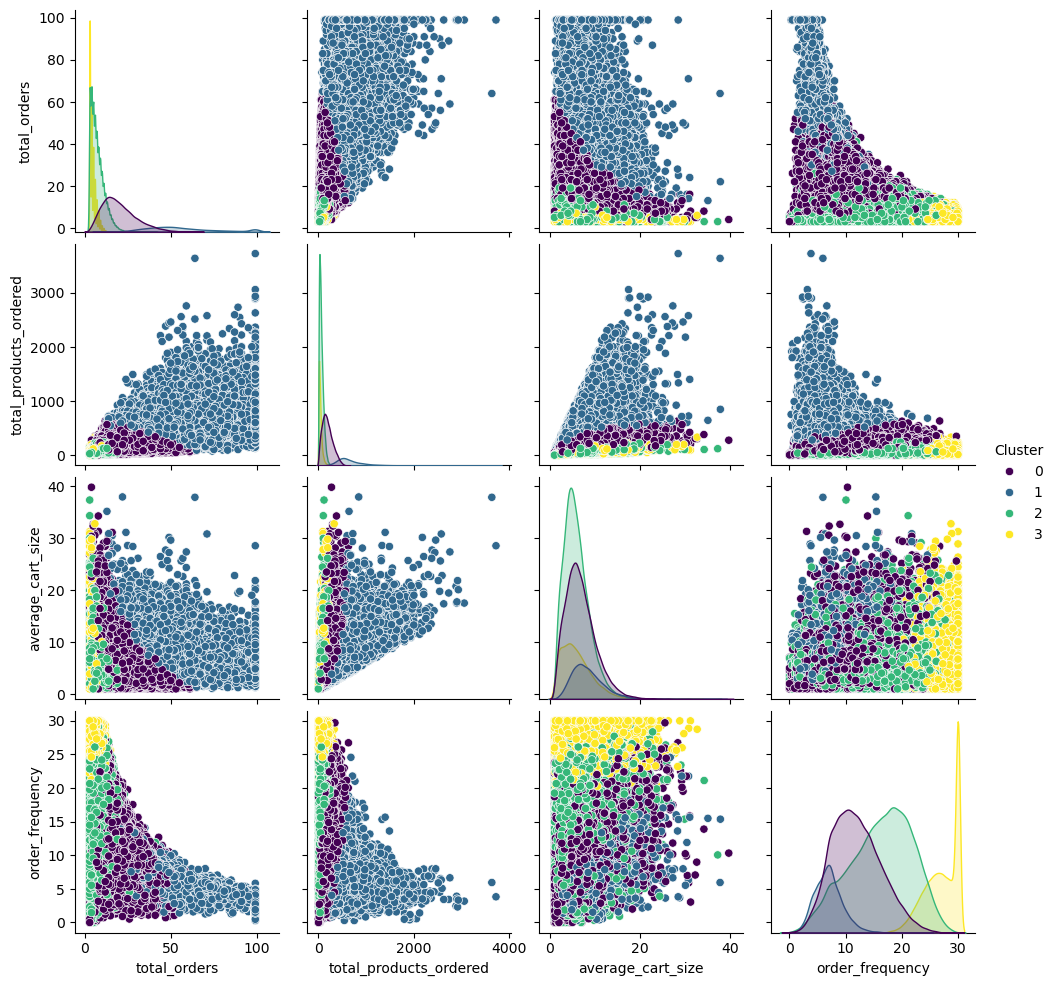

In [28]:
import seaborn as sns

# Pairplot (Scatter Plots for Multiple Features)
sns.pairplot(customer_df, hue="Cluster", vars=["total_orders", "total_products_ordered", "average_cart_size", "order_frequency"], palette="viridis")
plt.show()


/var/folders/v0/302vhr4n5dnbjpj8077_jckw0000gn/T/ipykernel_44907/4281603920.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=customer_df["Cluster"], y=customer_df["total_orders"], palette="viridis")


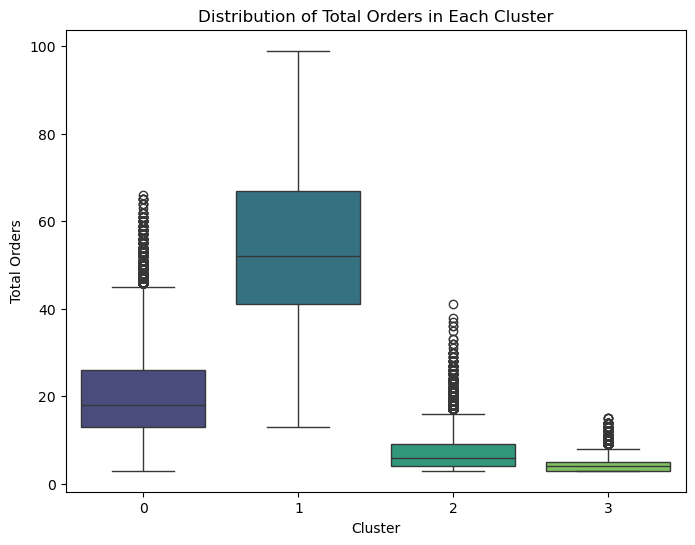

In [34]:
# Cluster Distribution for Each Feature

plt.figure(figsize=(8,6))
sns.boxplot(x=customer_df["Cluster"], y=customer_df["total_orders"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Total Orders")
plt.title("Distribution of Total Orders in Each Cluster")
plt.show()


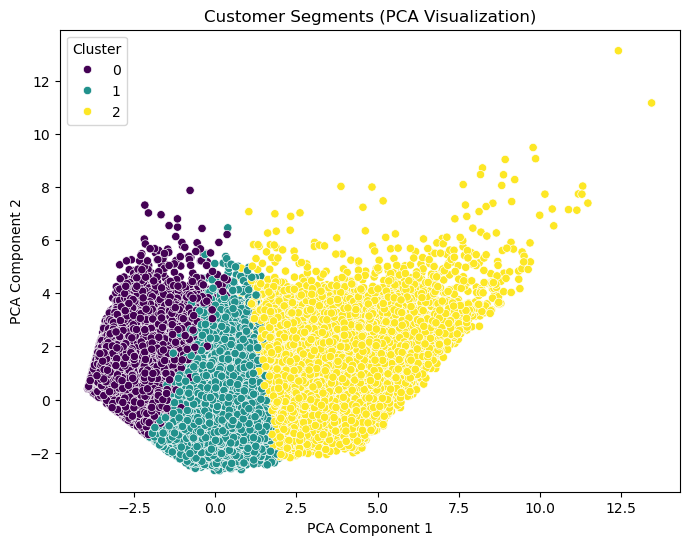

In [38]:
# PCA (Reduce Dimensions for 2D Plot)

from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to DataFrame
customer_df["PCA1"] = X_pca[:, 0]
customer_df["PCA2"] = X_pca[:, 1]

# Scatter plot of PCA-reduced data
plt.figure(figsize=(8,6))
sns.scatterplot(x=customer_df["PCA1"], y=customer_df["PCA2"], hue=customer_df["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segments (PCA Visualization)")
plt.legend(title="Cluster")
plt.show()
